## Ensemble Techniques - Term Deposit Sale (MIRV)

### Goal 
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

### Attribute information 
Input variables: 
 
Bank client data: 
1. age: Continuous feature  
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced) 
4. education: education level (primary, secondary, tertiary) 
5. default: has credit in default?  
6. housing: has housing loan?  
7. loan: has personal loan? 
8. balance in account 
 
Related to previous contact: 
9. contact: contact communication type 
10. month: last contact month of year 
11. day: last contact day of the month 
12. duration: last contact duration, in seconds* 
 
Other attributes: 
 
13.  campaign: number of contacts performed during this campaign and for this client 
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days) 
15. previous: number of contacts performed before this campaign and for this client 
16. poutcome: outcome of the previous marketing campaign 
 
Output variable (desired target): 

17. Target: Tell us has the client subscribed a term deposit. (Yes, No) 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus as pydot
import graphviz
from sklearn import tree
from os import system

### Import file and basic information

In [2]:
bank_df = pd.read_csv('bank-full.csv')
print('data shapee',bank_df.shape)
bank_df.head().T

data shapee (45211, 17)


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
# converting yes to 1 and no to 0
cat_col = ['default','housing','loan','Target']
for cat in bank_df[cat_col]:
    bank_df[cat] = bank_df[cat].apply(lambda x:1 if x=='yes' else 0)

In [8]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 1.0.- Exploratory Data Quality

<p style="color:blue;">1.1  Univariante Analysis </p>
 data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.  b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment. c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

Customers Average age: 40.94


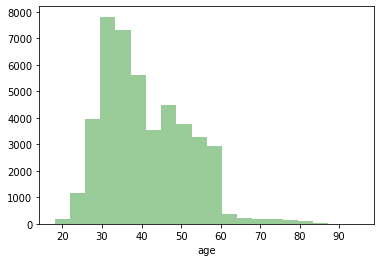

In [9]:
# 1 Age distribution
print('Customers Average age:',round(bank_df.age.mean(),2))
sns.distplot(bank_df.age,kde=False,bins=20,color='g')

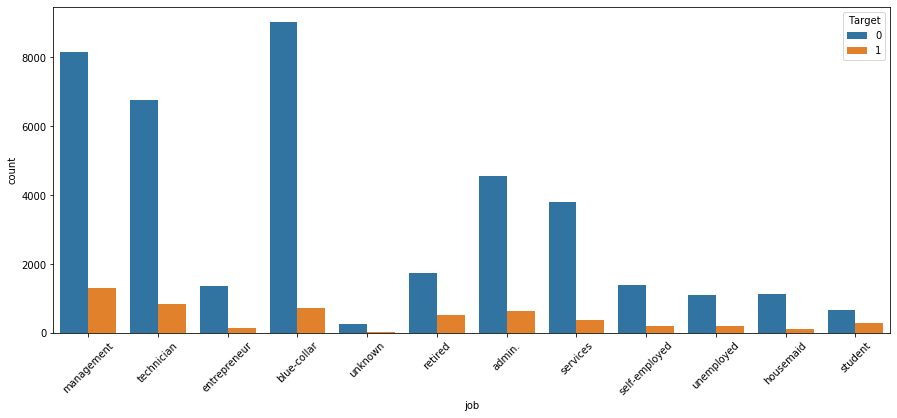

In [10]:
# 2.- Type of Job

plt.figure(figsize=(15,6))
ax = sns.countplot(x='job',data=bank_df,hue='Target')
plt.setp(ax.get_xticklabels(),rotation=45);

- 5 top customer professions: Blue-collar, management, technician, admin, and services 
- Highest customers profession with term deposit: management

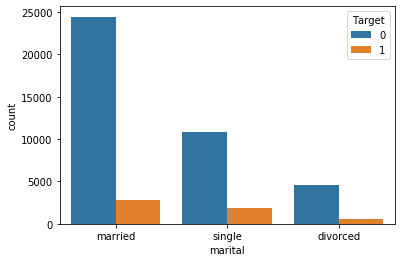

In [11]:
# 3.- Marital status
sns.countplot(x='marital',data=bank_df,hue='Target');

- Maiority of the customers are married followed by singles and divorced
- Married customer have the highest approval term deposit

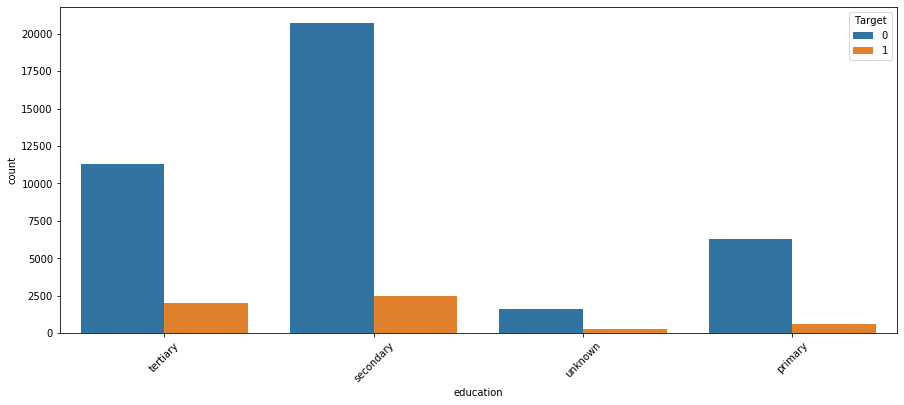

In [12]:
# 4.- Education level
plt.figure(figsize=(15,6))
ax = sns.countplot(x='education',data=bank_df,hue='Target')
plt.setp(ax.get_xticklabels(),rotation=45);

More customers with secondary education have term deposit 

Percent of customer with credit default : 1.8 %
Percent of customer with no credit default : 98.2 %
# Customers with credit default that have term deposit : 52
# Customers with no credit default that have term deposit : 5237


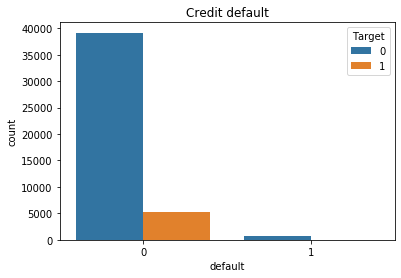

In [13]:
# 5.- Credit default analysis

sns.countplot(x='default',data=bank_df,hue='Target');
plt.title('Credit default');
sy = len(bank_df[bank_df.default==1])
sn = len(bank_df[bank_df.default==0])
print('Percent of customer with credit default :',round(sy/(sy+sn)*100,2),"%")
print('Percent of customer with no credit default :',round(sn/(sy+sn)*100,2),"%")
cd = bank_df.Target[(bank_df.default==1)&(bank_df.Target==1)].count()
print('# Customers with credit default that have term deposit :',cd)
cd2 = bank_df.Target[(bank_df.default==0)&(bank_df.Target==1)].count()
print("# Customers with no credit default that have term deposit :",cd2)

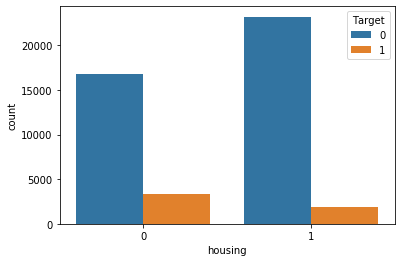

In [14]:
# 6.- Housing loan analysis
sns.countplot(x='housing',data=bank_df,hue='Target');

In [15]:
pd.crosstab(bank_df.housing, bank_df.Target,normalize=True)

Target,0,1
housing,,
0,0.369976,0.074185
1,0.513039,0.042799


Between the customers with long term deposit, the maiority of them have not housing loan.  

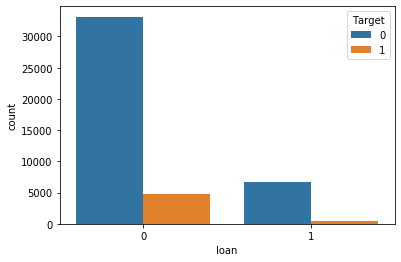

In [16]:
# 7.- Customers with personal Loan
sns.countplot(x='loan',data=bank_df,hue='Target');

In [17]:
pd.crosstab(bank_df.loan,bank_df.Target,normalize=True)

Target,0,1
loan,,
0,0.733494,0.106279
1,0.149521,0.010705


Between the customers with long term deposit, the maiority of them have not personal loan.  

Customer with negative balance amount : 3766 / 8.33 %
Customer with zero balance account : 3514 / 7.77 %
Customer with balance account between <0, 5,000] : 35086 / 77.61 %
Average customer balance :  1362.27
Right skewed distribution (mean - median is positive) : 914.27


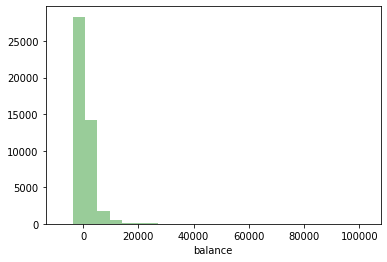

In [18]:
# 8.- Balance in account analysis
nbc = bank_df.balance[bank_df.balance<0].count()
print('Customer with negative balance amount :',nbc,'/',round(nbc/bank_df.shape[0]*100,2),"%")
zbc = bank_df.balance[bank_df.balance==0].count()
print('Customer with zero balance account :',zbc,'/',round(zbc/bank_df.shape[0]*100,2),"%")
pbc = bank_df.balance[(bank_df.balance>0)& (bank_df.balance<=5000)].count()
print('Customer with balance account between <0, 5,000] :',pbc,'/',round(pbc/bank_df.shape[0]*100,2),"%")
sns.distplot(bank_df.balance,kde=False,bins=25,color='g');
ban_median = bank_df.balance.median()
ban_mean = bank_df.balance.mean()
print('Average customer balance : ',round(ban_mean,2))
print('Right skewed distribution (mean - median is positive) :',round(ban_mean-ban_median,2))


<p style="color:red;">  Analysis related to previous contact </p>

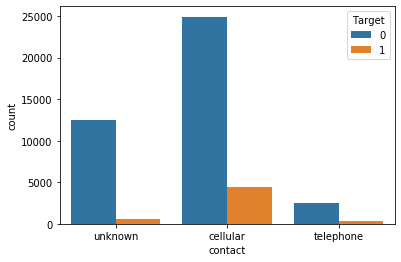

In [19]:
# 9.- Customers last contact communication type
sns.countplot(x='contact',data=bank_df,hue='Target');

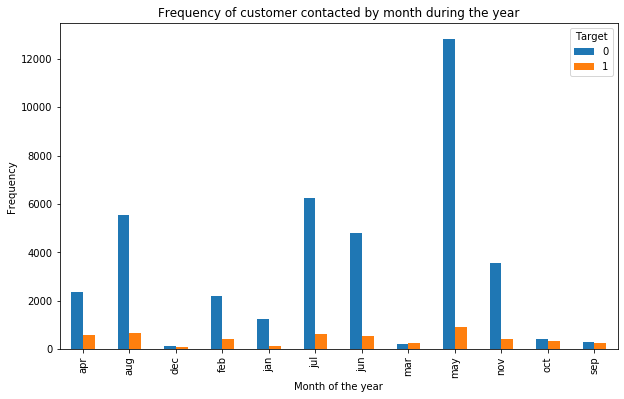

In [20]:
# 10.- Last concat day of the month
pd.crosstab(bank_df.month,bank_df.Target).plot(kind='bar',figsize=(10,6));
plt.title('Frequency of customer contacted by month during the year');
plt.xlabel('Month of the year');
plt.ylabel('Frequency');

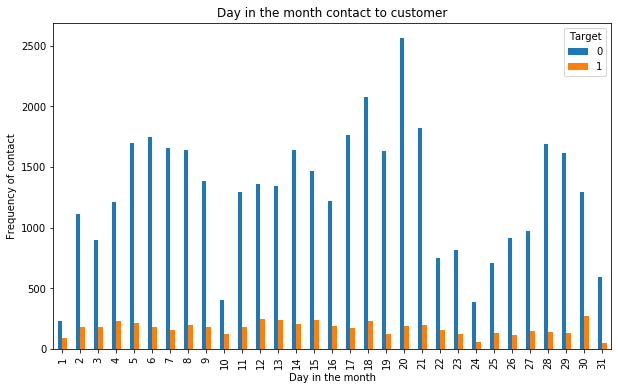

In [21]:
# 11.- last contact day of the month
pd.crosstab(bank_df.day,bank_df.Target).plot(kind='bar',figsize=(10,6));
plt.title('Day in the month contact to customer');
plt.xlabel('Day in the month');
plt.ylabel('Frequency of contact');

Average contact duration time in seconds : 258.16
Data show a right skewed distribution


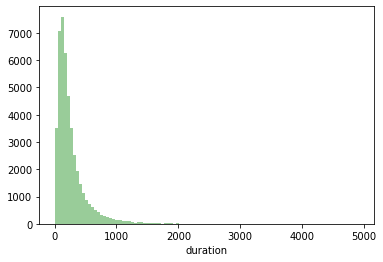

In [22]:
# 12.- Last contact duration in seconds
sns.distplot(bank_df.duration,kde=False,bins=100,color='g');
ban_median = bank_df.duration.median()
ban_mean = round(bank_df.duration.mean(),2)
print('Average contact duration time in seconds :',ban_mean)
print('Data show a right skewed distribution')

The maiority of the customer with term deposit were contact by cellphone with an average time talking of 5 min. The calls were made more frequently in May.

<p style="color:red;">  Other attributes information</p>

Customer were contacted in Average : 2.76 times


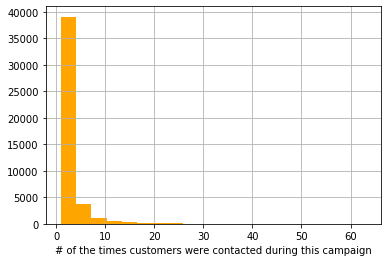

In [23]:
# 13.- campaign: number of contacts performed during this campaign and for this client
#bank_df.campaign.sort_values(ignore_index=True).plot()
print('Customer were contacted in Average :',round(bank_df.campaign.mean(),2),'times')
bank_df.campaign.hist(bins=20,color='orange');
plt.xlabel('# of the times customers were contacted during this campaign');

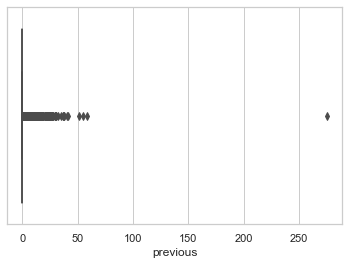

In [24]:
# 15.- previous: number of contacts performed before this campaign and for this client 
# cleaning data outlayer


sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_df.previous)

In [25]:
# replacing the outlayes data higher than 250 by the median value

bank_df.loc[bank_df.previous >250, 'previous'] = bank_df.previous.median()

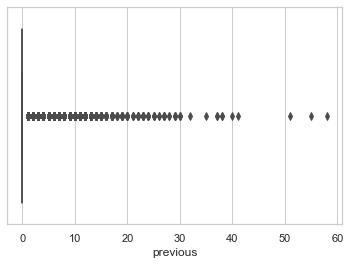

In [26]:


sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_df.previous)

Average times contacted by Customer before this campaign : 3.14


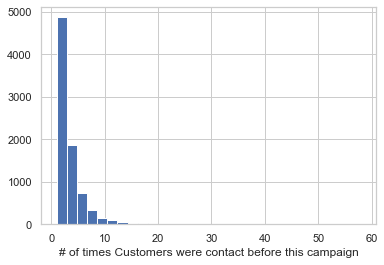

In [27]:
#previous: number of contacts performed before this campaign and for this client

pc = bank_df.previous[bank_df.previous>0].mean()
print('Average times contacted by Customer before this campaign :',round(pc,2))
bank_df.previous[bank_df.previous>0].hist(bins=30);
plt.xlabel('# of times Customers were contact before this campaign');

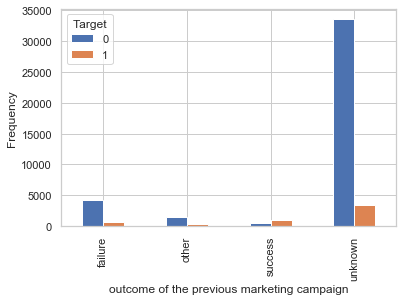

In [28]:
# 16.- poutcome: outcome of the previous marketing campaign

pd.crosstab(bank_df.poutcome,bank_df.Target).plot(kind='bar')
plt.xlabel('outcome of the previous marketing campaign');
plt.ylabel('Frequency');

Number of contacts performed during this campaign was 2.76 times/client compared to 3.14 for the previous campaign were the customer contacted were only 18.6% 

<p style="color:blue;">1.2  Bivariante Analysis </p>

Percent of subscriptors to term deposit : 11.7 %
Percent of no subscriptors to term deposit : 88.3 %


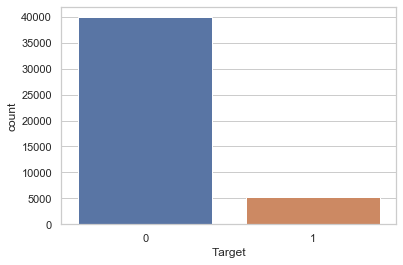

In [29]:
# 17.- Target analysis

sy  = len(bank_df.Target[bank_df.Target==1])
sn  = len(bank_df.Target[bank_df.Target==0])
print('Percent of subscriptors to term deposit :',round(sy/(sy+sn)*100,2),'%')
print('Percent of no subscriptors to term deposit :',round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target',data=bank_df);

data is not proportional (ratio 1/9). Data will be sintetic modified for better performance using "SMOT"

In [30]:
# mean values respect to Target
round(bank_df.groupby('Target').mean(),2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.84,0.02,1303.71,0.58,0.17,15.89,221.18,2.85,36.42,0.50
1,41.67,0.01,1804.27,0.37,0.09,15.16,537.29,2.14,68.70,1.17


- Customer with long term deposit have higher average age, balance account, and were contacted for longer duration compared with customers that don't have long term deposit.
- Customer with no long term deposit have more housing loan, personal loan, and credit default than customer with long term deposit.

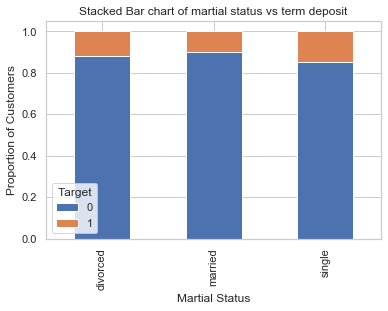

In [31]:
# Marital Status


table = pd.crosstab(bank_df.marital,bank_df.Target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar chart of martial status vs term deposit');
plt.xlabel('Martial Status');
plt.ylabel('Proportion of Customers');

Singles have the highest rate of approval term deposit

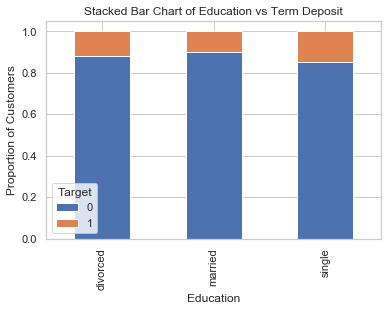

In [32]:
# Education Status
tabke = pd.crosstab(bank_df.education,bank_df.Target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Education vs Term Deposit');
plt.xlabel('Education');
plt.ylabel('Proportion of Customers');

Tertiary education have the highest rate of approval term deposit

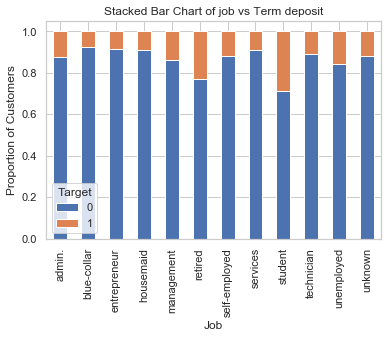

In [33]:
#Job Status
table=pd.crosstab(bank_df.job, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of job vs Term deposit');
plt.xlabel('Job');
plt.ylabel('Proportion of Customers');

Students have the highest rate of approval term deposit

In [34]:
# Preparing data for pairplot
# dropping columns with unique values below 5
biv = bank_df.copy()
for nun in bank_df:
    if bank_df[nun].nunique()<5:
        biv.drop(columns=nun,inplace=True)
biv.shape

(45211, 9)

In [35]:
# choosing no object data type
biv.select_dtypes(exclude ='object').shape

(45211, 7)

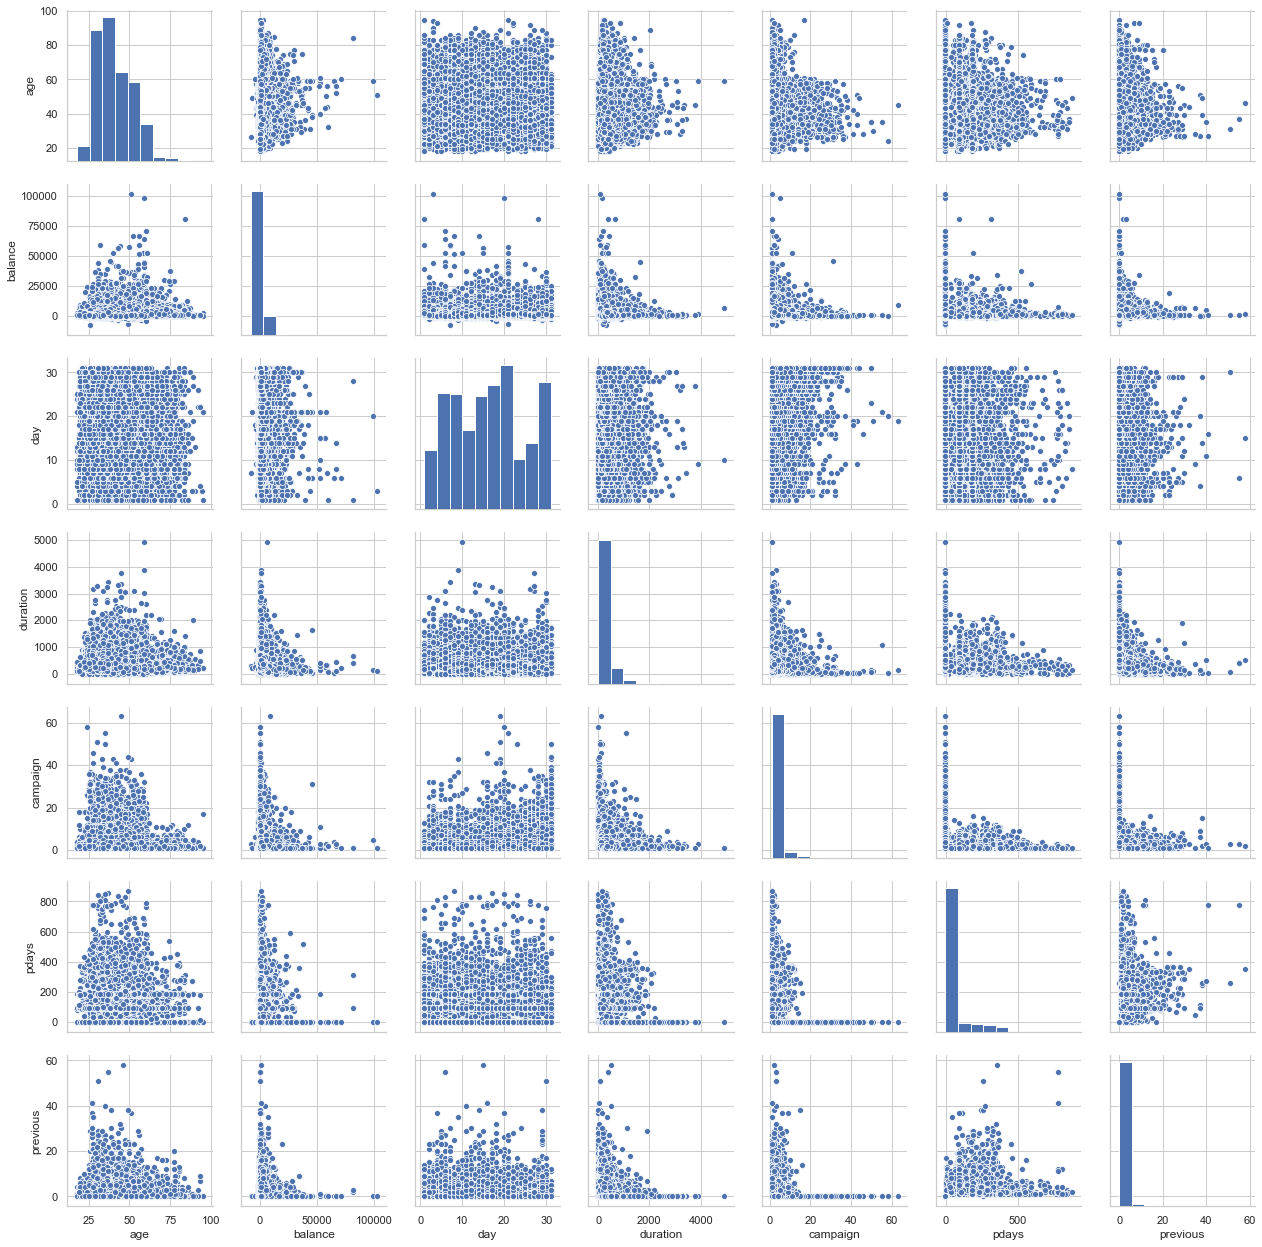

In [36]:
sns.pairplot(biv.select_dtypes(exclude ='object'));

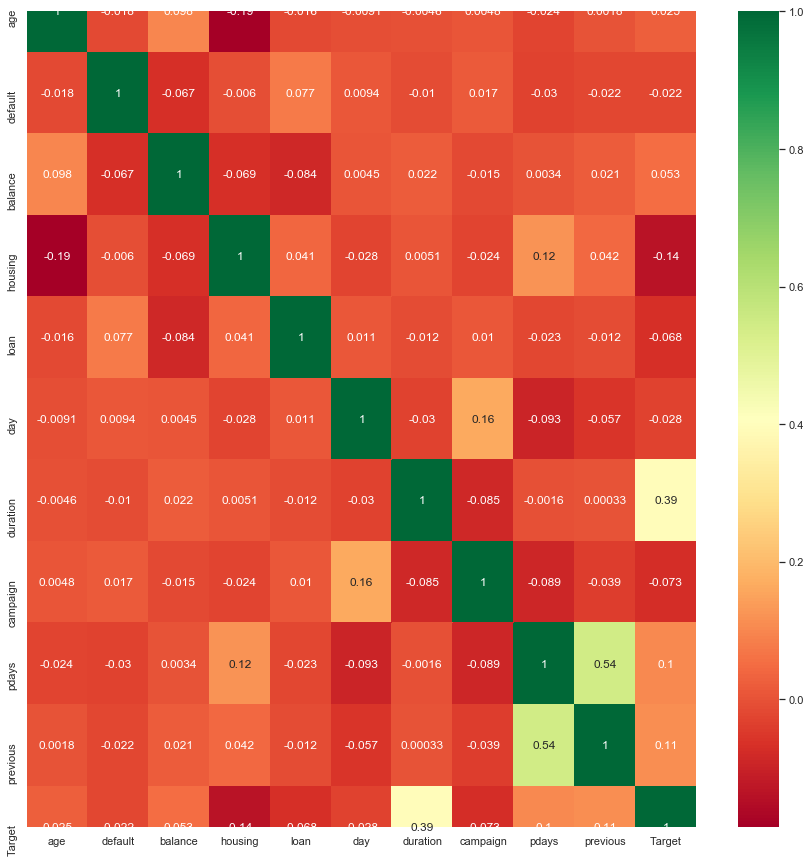

In [37]:
corrmat = bank_df.corr()
top_corr_features =corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(bank_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 2.0.- Prepare the data for analytics 
1. Ensure the attribute types are correct. If not, take appropriate actions. 
2. Get the data model ready.  
3. Transform the data i.e. scale / normalize if required 
4. Create the training set and test set in ratio of 70:30 

In [38]:
#changing objet to categorical data type
col_obj =bank_df.select_dtypes(include ='object')
for nun in col_obj:
    bank_df[nun] = bank_df[nun].astype('category')

In [39]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null float64
poutcome     45211 non-null category
Target       45211 non-null int64
dtypes: category(6), float64(1), int64(10)
memory usage: 4.1 MB


In [40]:
bank_df.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       40
poutcome        4
Target          2
dtype: int64

<p style="color:blue;">2.1 Create Dummy Variables </p>

In [41]:
data = pd.get_dummies(bank_df, columns=['job','marital','education','default','housing','loan','contact','day','month','poutcome'])

In [42]:
data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'month_apr', 'month_aug',
       'month_dec', 'month_

In [43]:
data.isnull().count()

age                    45211
balance                45211
duration               45211
campaign               45211
pdays                  45211
previous               45211
Target                 45211
job_admin.             45211
job_blue-collar        45211
job_entrepreneur       45211
job_housemaid          45211
job_management         45211
job_retired            45211
job_self-employed      45211
job_services           45211
job_student            45211
job_technician         45211
job_unemployed         45211
job_unknown            45211
marital_divorced       45211
marital_married        45211
marital_single         45211
education_primary      45211
education_secondary    45211
education_tertiary     45211
education_unknown      45211
default_0              45211
default_1              45211
housing_0              45211
housing_1              45211
                       ...  
day_18                 45211
day_19                 45211
day_20                 45211
day_21        

In [44]:
data.shape

(45211, 82)

<p style="color:blue;">2.2 Split Data X & y (70:30)</p>

In [45]:
X = data.drop(columns=['Target'])
X.shape

(45211, 81)

In [46]:
y = data['Target']
y.shape

(45211,)

In [47]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# checking splitting data 70:30
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100), '- total of', len(X_train))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100),'- total of', len(X_test))

70.00% data is in training set - total of 31647
30.00% data is in test set - total of 13564


<p style="color:blue;">2.3 Applying SMOTE (Synthetic Minority Oversampling Technique) for Handling Imbalanced Datasets </p>

Percent of subscriptors to term deposit : 11.7 %
Percent of no subscriptors to term deposit : 88.3 %


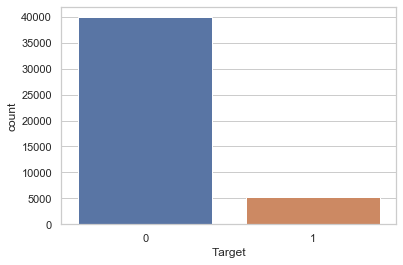

In [49]:
#Target analysis
sy = len(bank_df.Target[bank_df.Target==1])
sn = len(bank_df.Target[bank_df.Target==0])
print('Percent of subscriptors to term deposit :', round(sy/(sy+sn)*100,2),'%')
print('Percent of no subscriptors to term deposit :', round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target', data=bank_df);

In [54]:
!pip install imblearn

In [56]:
# Using the initial set of variables X & y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

ms = SMOTE(random_state=0)
X_res, y_res = ms.fit_resample(X_train, y_train)

In [57]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_res))
print("Number of no term deposit in oversampled data",len(y_res[y_res==0]))
print("Number of term deposit",len(y_res[y_res==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_res[y_res==0])/len(X_res))
print("Proportion of subscription data in oversampled data is ",len(y_res[y_res==1])/len(X_res))

length of oversampled data is  55906
Number of no term deposit in oversampled data 27953
Number of term deposit 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


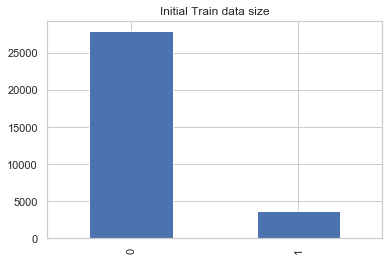

In [58]:
# initial train data size
ini = pd.Series(y_train).value_counts().plot.bar();
plt.title('Initial Train data size');

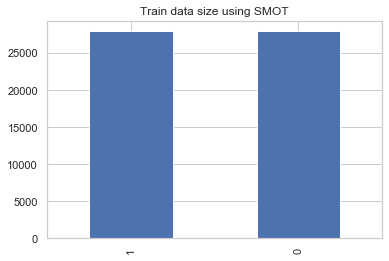

In [59]:
# New train data set has been balanced using SMOT
pd.Series(y_res).value_counts().plot.bar()
plt.title('Train data size using SMOT');

# 3.0.- Create the ensemble model 
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks) 
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks) 
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks) 

###  <p style="color:red;"> Defining a score and confision matrix function </p>

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

sc_tra,sc_tes,TPf,TNf,FPf,FNf = 0,0,0,0,0,0
Rec,Spec,Pres,Accu,f1,logit_roc_auc = 0,0,0,0,0,0

def score_confmetrics(model, X_train, y_train, X_test, y_test):
    global sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc
    ml_train = model.fit(X_train, y_train)
    sc_tra = round(ml_train.score(X_train, y_train),4)
    sc_tes = round(ml_train.score(X_test, y_test),4)
    # prediction
    y_predict = model.predict(X_test)
    #score the model
    print('\n' * 1)
    print('Model score_train :',round(sc_tra,4))
    print('Model score_test :',round(sc_tes,4))
    # confusion metrics
    confusion=confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    #Metric data
    print('\n' * 1)
    TPf = confusion[1,1]
    TNf = confusion[0,0]
    FPf = confusion[1,0]
    FNf = confusion[0,1]
    # classification report
    Rec = round(TPf/float(TPf+FNf),4)
    Spec = round(TNf/float(TNf+FPf),4)
    Pres = round(TPf/float(TPf+FPf),4)
    #Accu = round((TPf+TNf)/float(TPf+TNf+FPf+FNf),4)
    f1 = round(2*Pres*Rec/(Pres+Rec),4)
    print(classification_report(y_predict, y_test))
     # ROC Curve
    logit_roc_auc = round(roc_auc_score(y_test, model.predict(X_test)),4)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    # output
    return(sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc)

    

###  <p style="color:blue;"> 3.1.1.- Build Logistic Regression model </p>

#### <p style="color:red;"> Logistic Regression - Hyper Parameters Optimizaton </p>

In [61]:
from sklearn.linear_model import LogisticRegression
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [62]:
clas_LR = LogisticRegression()
params_LR={
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  :['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' :[100, 1000, 2000, 3000, 4000]
}
random_searchLR=RandomizedSearchCV(clas_LR,param_distributions=params_LR,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [63]:
random_searchLR.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.90888081        nan        nan        nan 0.70859238]
  category=UserWarning


In [64]:
random_searchLR.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 4000}



Model score_train : 0.9044
Model score_test : 0.9006


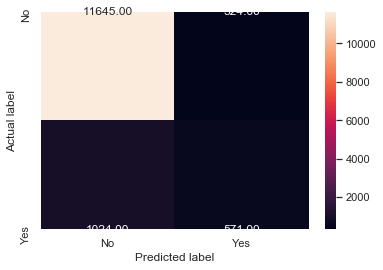



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12669
           1       0.36      0.64      0.46       895

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.70     13564
weighted avg       0.93      0.90      0.91     13564



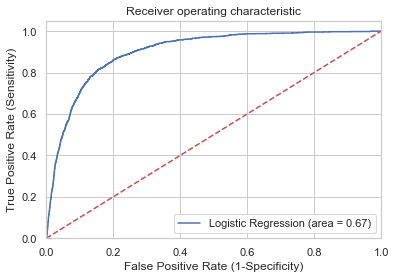

In [65]:
# Fit the model on train
model_LR = LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 4000, random_state=1)
# calling score_confmetrics funtion
model = model_LR
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_LR, ste_LR, TP_LR, TN_LR,FP_LR, FN_LR = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_LR,S_LR,P_LR,A_LR,f1_LR,l_LR = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.1.2.- Build Decision Tree Model </p>
We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split



Model score_train : 1.0
Model score_test : 0.8766


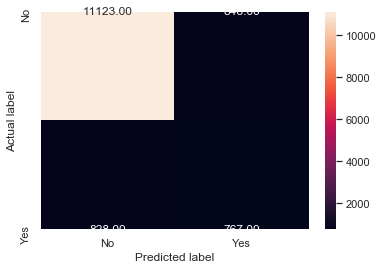



              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11951
           1       0.48      0.48      0.48      1613

    accuracy                           0.88     13564
   macro avg       0.71      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



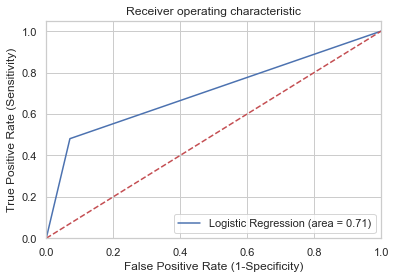

In [66]:
# decision tree number
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
# calling score_confmetrics funtion
model = dTree
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DT, ste_DT, TP_DT, TN_DT,FP_DT, FN_DT = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DT,S_DT,P_DT,A_DT,f1_DT,l_DT = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.1.3.- Build Decision Tree Model - Reducing Over fitting (Regularization)</p>

#### <p style="color:red;"> Decision Tree Classifier - Hyper Parameters Optimizaton </p>

In [67]:
clas_DTr = DecisionTreeClassifier()
#
params_DTr={
    'criterion'        :['gini','entropy'],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split':[ 2, 3, 5, 7, 10],
    'min_samples_leaf' :[ 1, 2, 3, 5, 7, 10],
}
#
random_searchDT=RandomizedSearchCV(clas_DTr,param_distributions=params_DTr,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [68]:
random_searchDT.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [69]:
random_searchDT.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'criterion': 'entropy'}



Model score_train : 0.9042
Model score_test : 0.8971


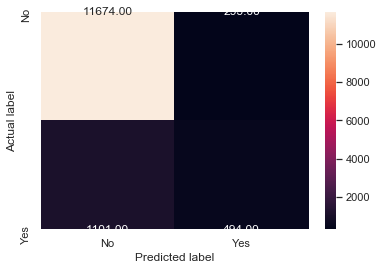



              precision    recall  f1-score   support

           0       0.98      0.91      0.94     12775
           1       0.31      0.63      0.41       789

    accuracy                           0.90     13564
   macro avg       0.64      0.77      0.68     13564
weighted avg       0.94      0.90      0.91     13564



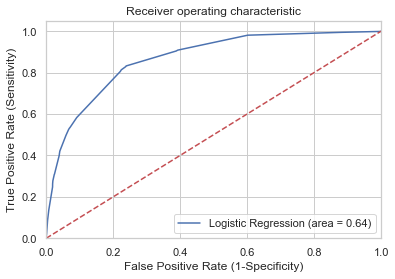

In [70]:
# decision tree number
dTree_r = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=10, random_state=1 )
# calling score_confmetrics funtion
model = dTree_r
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DTr, ste_DTr, TP_DTr, TN_DTr,FP_DTr, FN_DTr = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DTr,S_DTr,P_DTr,A_DTr,f1_DTr,l_DTr = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:green;"> 3.1.3.- Visualization - Reducing over fitting</p>

In [79]:
from sklearn.tree import export_graphviz
import io
from io import StringIO
from IPython.display import Image
import pydotplus
import graphviz
#
xvar = data.drop(columns=['Target'])
feature_cols = xvar.columns
train_char_label = ['No', 'Yes']

bank_tar = StringIO()
export_graphviz(dTree_r, out_file=bank_tar,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=train_char_label)
graph_bt = pydotplus.graph_from_dot_data(bank_tar.getvalue())  
graph_bt
#graph_bt.write_png('bank_target.png')
#Image(graph_bt.create_png())

### <p style="color:blue;"> 3.2.1.-  Ensemble learning - Bagging </p>

#### <p style="color:red;"> Bagging Classifier - Hyper Parameters Optimizaton </p>

In [80]:
from sklearn.ensemble import BaggingClassifier

In [81]:
clas_B = BaggingClassifier()
#
params_B={
    'n_estimators' :[10, 25, 50, 75, 100],
    'max_samples'  :[0.01, 0.1, 0.5, 0.75, 1.0],
    'max_features'  :[0.01, 0.1, 0.5, 0.75, 1.0]
}
#
random_searchB=RandomizedSearchCV(clas_B,param_distributions=params_B,
                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [82]:
random_searchB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [83]:
random_searchB.best_params_

{'n_estimators': 100, 'max_samples': 0.75, 'max_features': 0.5}



Model score_train : 0.8988
Model score_test : 0.8924


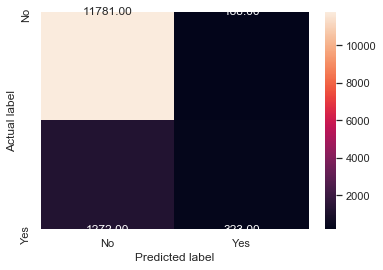



              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13053
           1       0.20      0.63      0.31       511

    accuracy                           0.89     13564
   macro avg       0.59      0.77      0.62     13564
weighted avg       0.95      0.89      0.92     13564



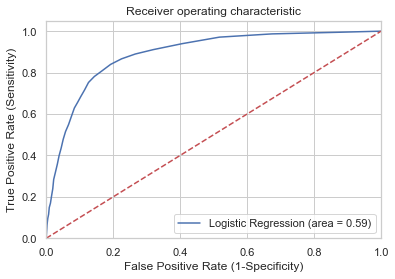

In [84]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= 0.01,max_features= 0.75, random_state=1)
# calling score_confmetrics funtion
model = bgcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_bg, ste_bg, TP_bg, TN_bg,FP_bg, FN_bg = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_bg,S_bg,P_bg,A_bg,f1_bg,l_bg = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.2.-  Ensemble learning - RandomForest Classifier (Reducing Overfitting)</p>  

#### <p style="color:red;"> Random Forest Classifier - Hyper Parameters Optimizaton </p>

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
clas_RF = RandomForestClassifier()
#
params_RF={
    'criterion'        :['gini','entropy'],
    'n_estimators' :[100, 250, 500, 750, 1000],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split' :[2, 3, 5, 7, 10, 15],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10, 15]
}
#
random_searchRF=RandomizedSearchCV(clas_RF,param_distributions=params_RF,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [87]:
random_searchRF.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [88]:
random_searchRF.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_depth': 16,
 'criterion': 'entropy'}



Model score_train : 0.9174
Model score_test : 0.8983


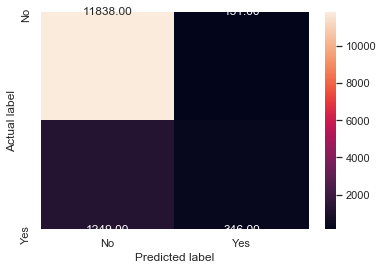



              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13087
           1       0.22      0.73      0.33       477

    accuracy                           0.90     13564
   macro avg       0.60      0.81      0.64     13564
weighted avg       0.96      0.90      0.92     13564



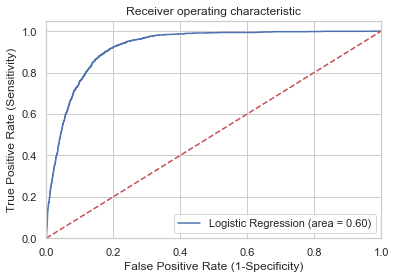

In [89]:
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, max_depth=15, 
                              min_samples_split=15, min_samples_leaf=2,random_state=1)
# calling score_confmetrics funtion
model = rfcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_rf, ste_rf, TP_rf, TN_rf,FP_rf, FN_rf = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_rf,S_rf,P_rf,A_rf,f1_rf,l_rf = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.3.-  Ensemble learning - AdaBoosting </p>

#### <p style="color:red;"> AdaBoosting Classifier - Hyper Parameters Optimizaton </p>

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
clas_AB = AdaBoostClassifier()
#
params_AB={
    'n_estimators' :[50, 100, 150, 200, 250],
    'learning_rate'  :[0.1, 0.3, 0.5, 0.75, 1.0],
}
#
random_searchAB=RandomizedSearchCV(clas_AB,param_distributions=params_AB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [92]:
random_searchAB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [93]:
random_searchAB.best_params_

{'n_estimators': 250, 'learning_rate': 0.5}



Model score_train : 0.9036
Model score_test : 0.898


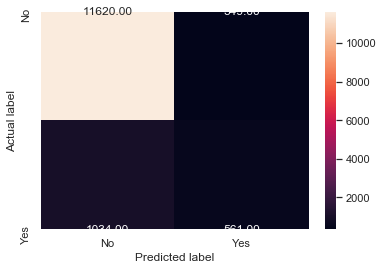



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12654
           1       0.35      0.62      0.45       910

    accuracy                           0.90     13564
   macro avg       0.66      0.77      0.70     13564
weighted avg       0.93      0.90      0.91     13564



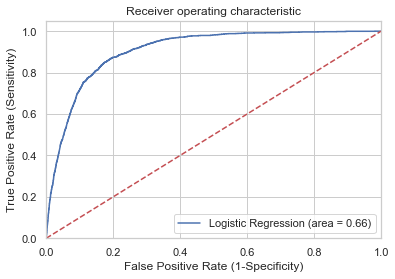

In [94]:
abcl = AdaBoostClassifier(n_estimators=150, learning_rate=0.3, random_state=1)
# calling score_confmetrics funtion
model = abcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_ab, ste_ab, TP_ab, TN_ab,FP_ab, FN_ab = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_ab,S_ab,P_ab,A_ab,f1_ab,l_ab = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.4.-  Ensemble learning - GradientBoost </p> 

#### <p style="color:red;"> GradientBoost Classifier - Hyper Parameters Optimizaton </p>

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
clas_GB = GradientBoostingClassifier()
#
params_GB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.01, 0.05, 0.075, 0.1],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[2, 3, 5, 7, 10],
}
#
random_searchGB=RandomizedSearchCV(clas_GB,param_distributions=params_GB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [97]:
random_searchGB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [98]:
random_searchGB.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 2,
 'learning_rate': 0.1}



Model score_train : 0.9043
Model score_test : 0.8972


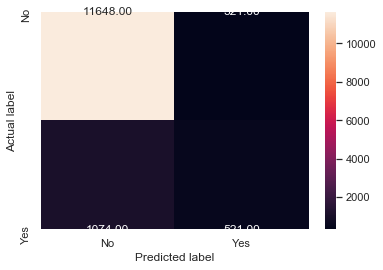



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12722
           1       0.33      0.62      0.43       842

    accuracy                           0.90     13564
   macro avg       0.65      0.77      0.69     13564
weighted avg       0.93      0.90      0.91     13564



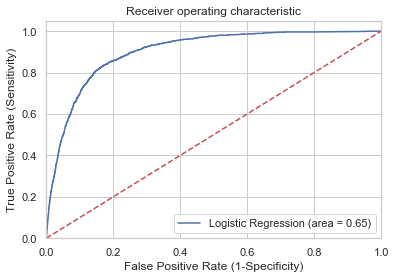

In [99]:
gbcl = GradientBoostingClassifier(n_estimators = 200, max_depth=1, 
                                  learning_rate=0.1, min_samples_leaf=2,
                                  min_samples_split=2, random_state=1)
# calling score_confmetrics funtion
model = gbcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_gb, ste_gb, TP_gb, TN_gb,FP_gb, FN_gb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_gb,S_gb,P_gb,A_gb,f1_gb,l_gb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.5.-  Ensemble learning - XGBoost Classifier </p>  

In [ ]:
# Install xgboost first
# ! pip install --upgrade xgboost;

In [100]:
import xgboost as xgb

#### <p style="color:red;"> XGBoost Classifier - Hyper Parameters Optimizaton </p>

In [101]:
classifier = xgb.XGBClassifier()
#
params={
    "learning_rate"    :[0.001, 0.05, 0.1, 0.5, 0.75, 0.1],
    "max_depth"        :[   1,    2,   3],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4],
    "colsample_bytree" :[0.3,   0.4,  0.5,  0.7]
}
#
random_search=RandomizedSearchCV(classifier,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [102]:
random_search.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [103]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.5,
 'gamma': 0.2,
 'colsample_bytree': 0.4}



Model score_train : 0.9165
Model score_test : 0.9028


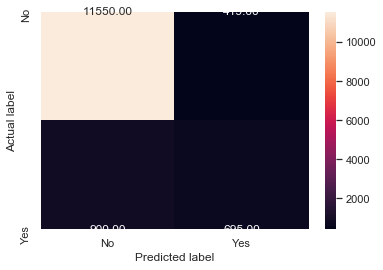



              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12450
           1       0.44      0.62      0.51      1114

    accuracy                           0.90     13564
   macro avg       0.70      0.78      0.73     13564
weighted avg       0.92      0.90      0.91     13564



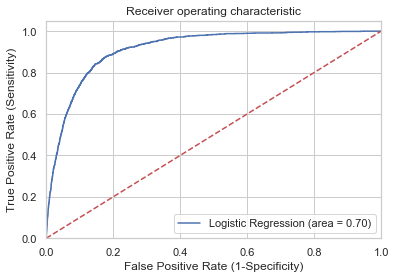

In [104]:
xgb_m = xgb.XGBClassifier(min_child_weight= 5,
                          max_depth= 2,
                          learning_rate= 0.75,
                          gamma= 0.1,
                          colsample_bytree= 0.4, random_state=1)
#
# calling score_confmetrics funtion
model = xgb_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_xgb, ste_xgb, TP_xgb, TN_xgb,FP_xgb, FN_xgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_xgb,S_xgb,P_xgb,A_xgb,f1_xgb,l_xgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.6.-  Ensemble learning - LightGBM </p>  

In [ ]:
# Install lightgbm first
# ! pip install --upgrade lightgbm;

#### <p style="color:red;"> XLightGBM Classifier - Hyper Parameters Optimizaton </p>

In [105]:
import lightgbm as lgbm

In [106]:
clas_LGB = lgbm.LGBMClassifier()
#
params_LGB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.02, 0.04, 0.06, 0.08, 0.1]
}
#
random_searchLGB=RandomizedSearchCV(clas_LGB,param_distributions=params_LGB,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [107]:
random_searchLGB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [108]:
random_searchLGB.best_params_

{'n_estimators': 250, 'learning_rate': 0.04}



Model score_train : 0.9225
Model score_test : 0.9045


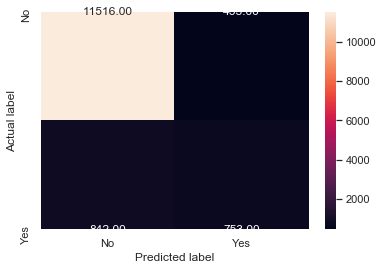



              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12358
           1       0.47      0.62      0.54      1206

    accuracy                           0.90     13564
   macro avg       0.72      0.78      0.74     13564
weighted avg       0.92      0.90      0.91     13564



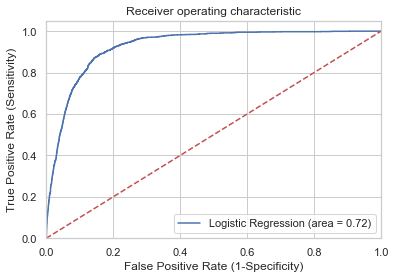

In [109]:
lgbm_m = lgbm.LGBMClassifier(n_estimators = 150, learning_rate=0.04, random_state=1)
# calling score_confmetrics funtion
model = lgbm_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_lgb, ste_lgb, TP_lgb, TN_lgb,FP_lgb, FN_lgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_lgb,S_lgb,P_lgb,A_lgb,f1_lgb,l_lgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### Summary of the Algoritms

In [110]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression','Decision Tree- Reduce Overfit',
                                    'Bagging','RandomForest - Reduce Overfit',
                                    'AdaBoosting','GradientBoost','XGBoost','LightGBM'], 
                         'Score_Train':   [str_LR,str_DTr,str_bg,str_rf,str_ab,str_gb,str_xgb,str_lgb],
                         'Score_Test':    [ste_LR,ste_DTr,ste_bg,ste_rf,ste_ab,ste_gb,ste_xgb,ste_lgb],
                         'True Positive': [ TP_LR, TP_DTr, TP_bg, TP_rf, TP_ab, TP_gb, TP_xgb, TP_lgb],
                         'True Negative': [ TN_LR, TN_DTr, TN_bg, TN_rf, TN_ab, TN_gb, TN_xgb, TN_lgb],
                         'False Positive':[ FP_LR, FP_DTr, FP_bg, FP_rf, FP_ab, FP_gb, FP_xgb, FP_lgb],
                         'False Negative':[ FN_LR, FN_DTr, FN_bg, FN_rf, FN_ab, FN_gb, FN_xgb, FN_lgb],
                         'Recall':        [  R_LR,  R_DTr,  R_bg,  R_rf,  R_ab,  R_gb,  R_xgb,  R_lgb],
                         'Specifity':     [  S_LR,  S_DTr,  S_bg,  S_rf,  S_ab,  S_gb,  S_xgb,  S_lgb],
                         'Precision':     [  P_LR,  P_DTr,  P_bg,  P_rf,  P_ab,  P_gb,  P_xgb,  P_lgb],
                         'F1':            [ f1_LR, f1_DTr, f1_bg, f1_rf, f1_ab, f1_gb, f1_xgb, f1_lgb],
                         'Area U_Curve':  [  l_LR,  l_DTr,  l_bg,  l_rf,  l_ab,  l_gb,  l_xgb,  l_lgb] })

resultsDf = resultsDf[['Method', 'Score_Train','Score_Test','True Positive','True Negative','False Positive',
                       'False Negative','Recall','Specifity','Precision','F1','Area U_Curve']]

In [111]:
resultsDf=resultsDf.sort_values(by=['Area U_Curve']).set_index('Method')

In [112]:
resultsDf

,Score_Train,Score_Test,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
Method,,,,,,,,,,,
Bagging,0.8988,0.8924,323,11781,1272,188,0.6321,0.9026,0.2025,0.3067,0.5934
RandomForest - Reduce Overfit,0.9174,0.8983,346,11838,1249,131,0.7254,0.9046,0.2169,0.3339,0.6030
Decision Tree- Reduce Overfit,0.9042,0.8971,494,11674,1101,295,0.6261,0.9138,0.3097,0.4144,0.6425
GradientBoost,0.9043,0.8972,521,11648,1074,321,0.6188,0.9156,0.3266,0.4275,0.6499
AdaBoosting,0.9036,0.8980,561,11620,1034,349,0.6165,0.9183,0.3517,0.4479,0.6613
Logistic Regression,0.9044,0.9006,571,11645,1024,324,0.6380,0.9192,0.3580,0.4586,0.6655
XGBoost,0.9165,0.9028,695,11550,900,419,0.6239,0.9277,0.4357,0.5131,0.7004
LightGBM,0.9225,0.9045,753,11516,842,453,0.6244,0.9319,0.4721,0.5377,0.7171


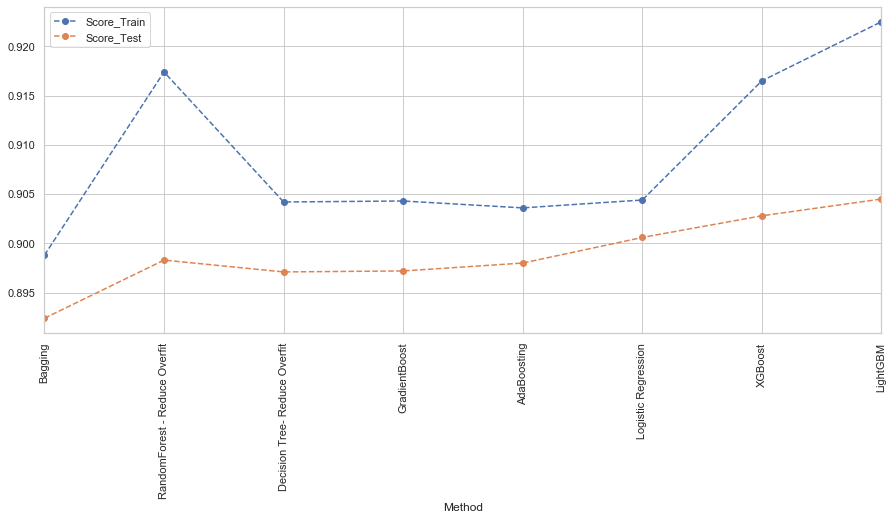

In [113]:
ax=resultsDf[['Score_Train','Score_Test']]
ax.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

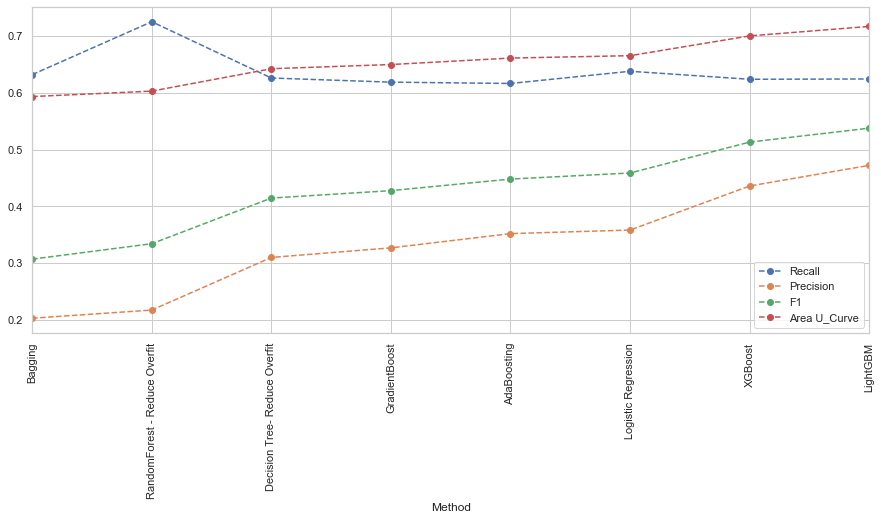

In [114]:
ax =resultsDf[['Recall','Precision','F1', 'Area U_Curve']]
ax.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

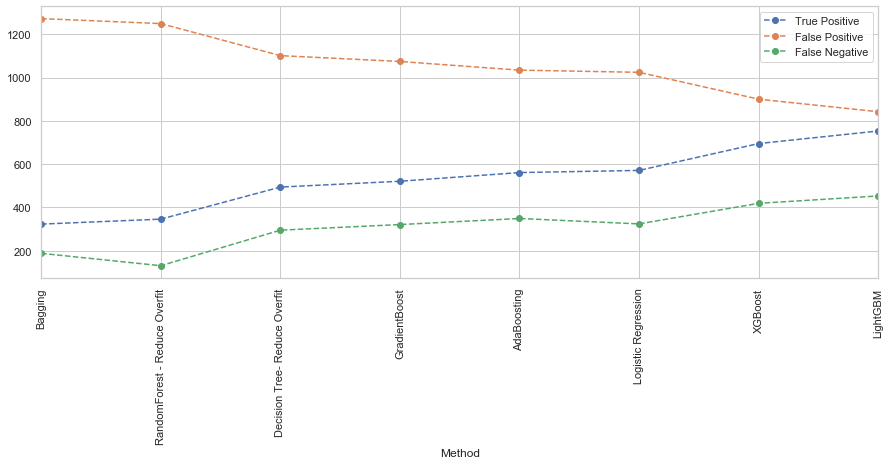

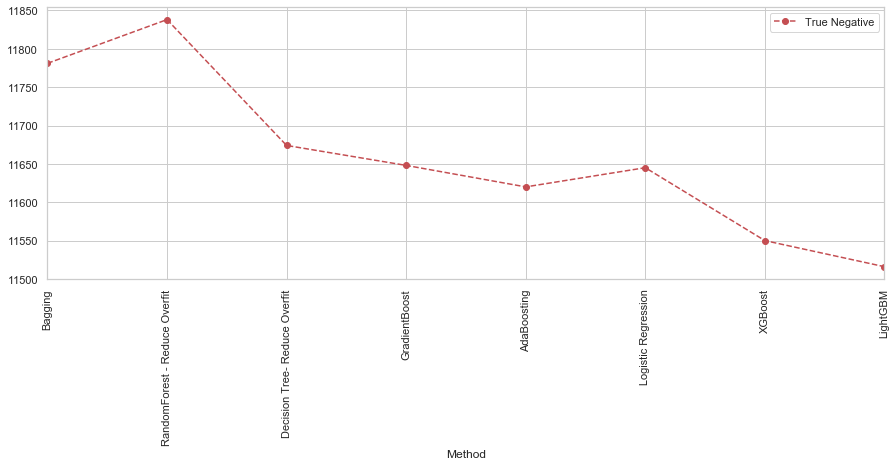

In [115]:
ax = resultsDf[['True Positive','False Positive','False Negative']]
ax.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o');

ax = resultsDf[['True Negative']]
ax.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o', color='r');

In [116]:
resultsDf.describe()

,Score_Train,Score_Test,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.908963,0.898862,533.000000,11659.000000,1062.000000,310.000000,0.638150,0.916712,0.334150,0.429975,0.654138
std,0.008523,0.003761,150.050468,107.781525,150.050468,107.781525,0.035916,0.010111,0.094077,0.079580,0.042665
min,0.898800,0.892400,323.000000,11516.000000,842.000000,131.000000,0.616500,0.902600,0.202500,0.306700,0.593400
25%,0.904050,0.897175,457.000000,11602.500000,993.000000,268.250000,0.622625,0.911500,0.286500,0.394275,0.632625
50%,0.904350,0.898150,541.000000,11646.500000,1054.000000,322.500000,0.625250,0.916950,0.339150,0.437700,0.655600
75%,0.916725,0.901150,602.000000,11700.750000,1138.000000,366.500000,0.633575,0.921325,0.377425,0.472225,0.674225
max,0.922500,0.904500,753.000000,11838.000000,1272.000000,453.000000,0.725400,0.931900,0.472100,0.537700,0.717100


# Final Observations:

1.- The lowest two performace models: Baggin and RandomForest.

2.- the best two performance models: XGBoost and LightGBM (Best Algoritm).

3.- Hyperparameters optimization was used in all the models

4.- "rou_auc" was used as scoring reference

5.- Score train is slightly higher than Score_Test (Aveg. Score test using all the models =89.99%)

6.- There is not difference not using or using SMOT in Logistic Regression

7.- Algorit shows a better performance in this order:
    - (1) Bagging, (2) RandomForest-Red. Overfit, (3) Decision Tree-Red. Overfit, (4) GradientBoost
    (5) AdaBoosting, (6) Logistic Regression, (7) XGBoost, (8) LightGBM

#### <p style="color:red;"> Logistic Regression - Applying SMOT </p>

In [118]:
ms = SMOTE(random_state=0)
X_res, y_res = ms.fit_resample(X_train, y_train)

In [121]:
# evaluating P values
#import statsmodels.api as sm
#logit = sm.Logit( y_res, X_res )
#lg = logit.fit()
#lg.summary2()



Model score_train : 0.9452
Model score_test : 0.9011


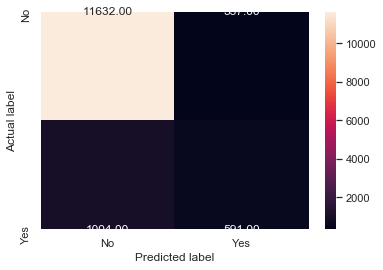



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12636
           1       0.37      0.64      0.47       928

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.71     13564
weighted avg       0.93      0.90      0.91     13564



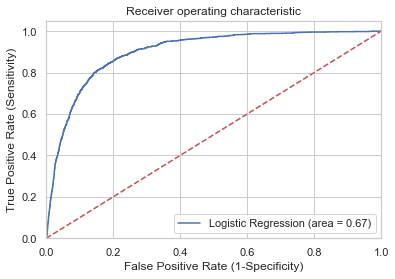

In [122]:
# Fit the model on train
model_LRS = LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 4000, random_state=1)
# calling score_confmetrics funtion
model = model_LRS
X_train = X_res
y_train = y_res
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_LRS, ste_LRS, TP_LRS, TN_LRS,FP_LRS, FN_LRS = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_LRS,S_LRS,P_LRS,A_LRS,f1_LRS,l_LRS = Rec,Spec,Pres,Accu,f1,logit_roc_auc

There is almost not difference using or not using SMOT in Logistic Regression